In [2]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

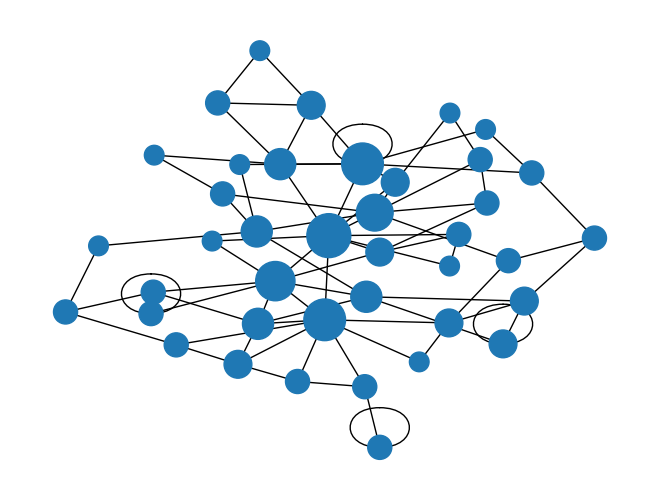

In [17]:
n, m, p = 40, 2, 0.5
G = nx.complete_graph(m)
for no in range(m, n):
    for i in range(1,m):
        j = random.choices(list(G.nodes),k=1)[0]
        G.add_edge(no, j)
        if random.uniform(0,1)< p :
            G.add_edge(no, random.choices(list(G.neighbors(j)),k=1)[0])
        else:   
            G.add_edge(no, random.choices([l for l in G.nodes if l != j ],k=1)[0])
sizes = [d*100 for v,d in G.degree()]
nx.draw(G,nx.kamada_kawai_layout(G), node_size=sizes)


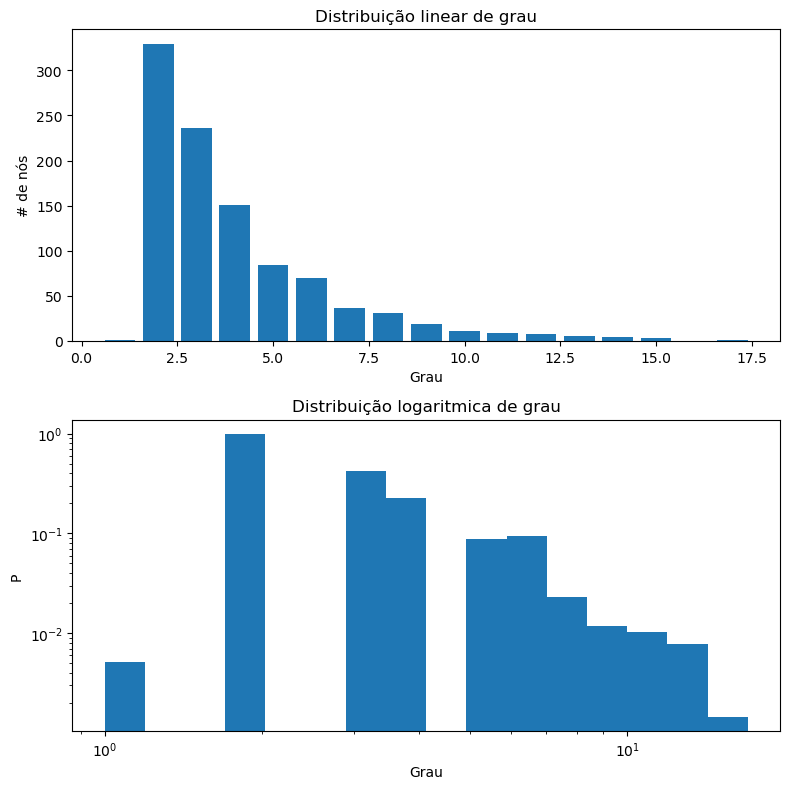

In [11]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(6, 4)
degree_sequence = sorted((d for n, d in G.degree() if d >0), reverse=True)

ax0 = fig.add_subplot(axgrid[0:3, :])
ax0.bar(*np.unique(degree_sequence, return_counts=True))
ax0.set_title("Distribuição linear de grau")
ax0.set_xlabel("Grau")
ax0.set_ylabel("# de nós")

ax1 = fig.add_subplot(axgrid[3:, :])
start, stop = np.log10(min(degree_sequence)), np.log10(max(degree_sequence))
bins = 10 ** np.linspace(start, stop, max(degree_sequence))

ax1.hist(degree_sequence, log=True, density=True, bins=bins)
ax1.set_xscale('log')
ax1.set_title("Distribuição logaritmica de grau")
ax1.set_xlabel("Grau")
ax1.set_ylabel("P")

fig.tight_layout()
plt.show()
